<a href="https://colab.research.google.com/github/arielabade/dataAnalysis/blob/main/CO2Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Upload dos Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
data = pd.read_csv('CO2_emission.csv')

# 2 Visualização dos Dados

In [ ]:
data

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5


In [ ]:
data.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [ ]:
data.isnull().sum()

Model_Year                                0
Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions                             0
Smog_Level                                0
dtype: int64

In [ ]:
data.head()


,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [ ]:
data.tail()


,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5
934,2021,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,12.1,8.5,10.5,245,7


In [ ]:
emissoes_por_marca = data.groupby('Make')['CO2_Emissions'].describe()
print(emissoes_por_marca)

               count        mean        std    min     25%    50%     75%  \
Make                                                                        
Acura            6.0  231.666667  18.811344  199.0  230.25  231.5  239.50   
Alfa Romeo       6.0  237.500000  33.649666  205.0  217.25  222.0  259.75   
Aston Martin     6.0  311.166667  34.787450  270.0  281.25  318.0  330.75   
Audi            43.0  260.767442  48.414794  194.0  217.50  247.0  294.50   
BMW             54.0  273.462963  54.849266  195.0  218.00  277.0  323.00   
Bentley          8.0  338.125000  39.324429  290.0  304.25  343.5  373.00   
Bugatti          2.0  565.000000  60.811183  522.0  543.50  565.0  586.50   
Buick            9.0  221.666667  29.423630  188.0  204.00  214.0  222.00   
Cadillac        22.0  248.409091  39.307892  203.0  223.25  239.0  260.00   
Chevrolet       84.0  285.333333  53.043363  165.0  254.75  294.0  327.25   
Chrysler         6.0  261.000000  18.793616  242.0  249.00  253.5  273.75   

# 3 Limpeza Dos Dados


In [ ]:
colunas_para_excluir = ['Model_Year', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders', 'Transmission', 'Smog_Level']

In [ ]:
clean_data = data.drop(columns = colunas_para_excluir)

In [ ]:
clean_data

,Make,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions
0,Acura,9.9,7.0,8.6,199
1,Acura,11.1,10.8,11.0,256
2,Acura,11.0,8.6,9.9,232
3,Acura,11.3,9.1,10.3,242
4,Acura,11.2,8.0,9.8,230
...,...,...,...,...,...
930,Volvo,10.7,7.7,9.4,219
931,Volvo,11.1,8.3,9.9,230
932,Volvo,11.7,8.6,10.3,240
933,Volvo,11.5,8.4,10.1,236


In [ ]:
clean_data.head()

,Make,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions
0,Acura,9.9,7.0,8.6,199
1,Acura,11.1,10.8,11.0,256
2,Acura,11.0,8.6,9.9,232
3,Acura,11.3,9.1,10.3,242
4,Acura,11.2,8.0,9.8,230


In [ ]:
clean_data.tail()

,Make,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions
930,Volvo,10.7,7.7,9.4,219
931,Volvo,11.1,8.3,9.9,230
932,Volvo,11.7,8.6,10.3,240
933,Volvo,11.5,8.4,10.1,236
934,Volvo,12.1,8.5,10.5,245


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    935 non-null    object 
 1   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 2   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 3   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 4   CO2_Emissions                           935 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 36.6+ KB


In [ ]:
clean_data.describe()

,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions
count,935.000000,935.000000,935.000000,935.000000
mean,12.498610,9.306203,11.060214,258.529412
std,3.487271,2.215819,2.867028,64.442768
min,4.000000,3.900000,4.000000,94.000000
25%,10.100000,7.700000,9.100000,213.000000
50%,12.000000,9.000000,10.700000,255.000000
75%,14.800000,10.800000,13.100000,303.500000
max,30.300000,20.900000,26.100000,608.000000


<Axes: >

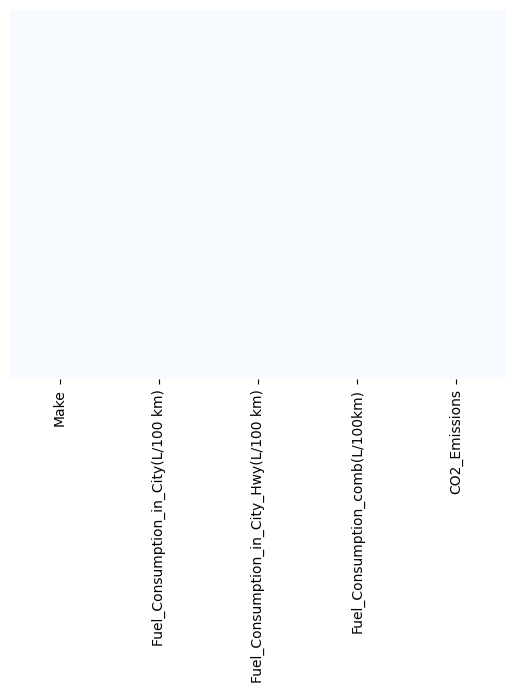

In [ ]:
sns.heatmap(clean_data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

# 4 Visualização de Dados


<Figure size 1000x600 with 0 Axes>

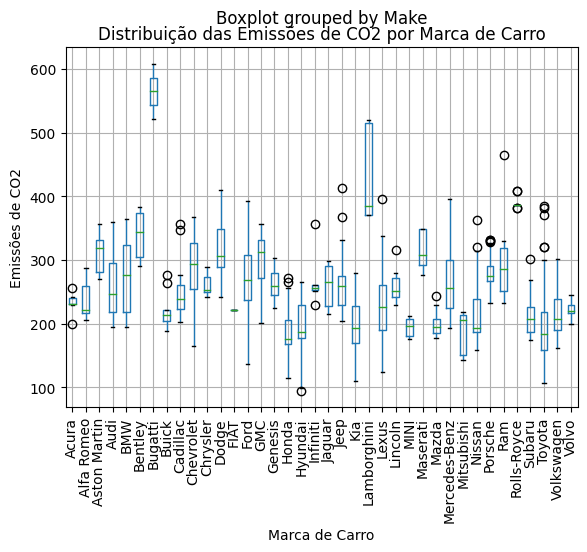

In [ ]:
plt.figure(figsize=(10, 6))
data.boxplot(column='CO2_Emissions', by='Make', rot=90)
plt.xlabel('Marca de Carro')
plt.ylabel('Emissões de CO2')
plt.title('Distribuição das Emissões de CO2 por Marca de Carro')
plt.show()

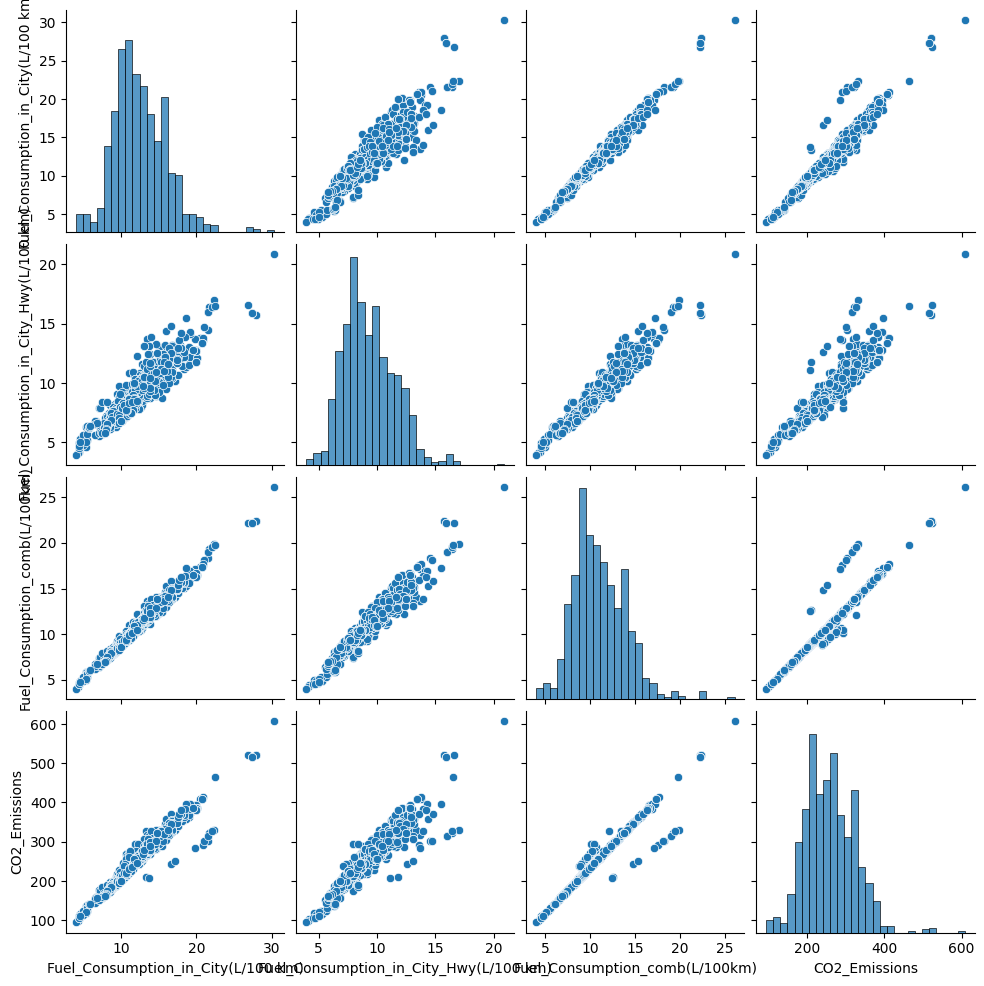

In [ ]:
sns.pairplot(clean_data)

In [ ]:
correlation = clean_data.corr()

<ipython-input-49-886265dd979b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = clean_data.corr()


<Axes: >

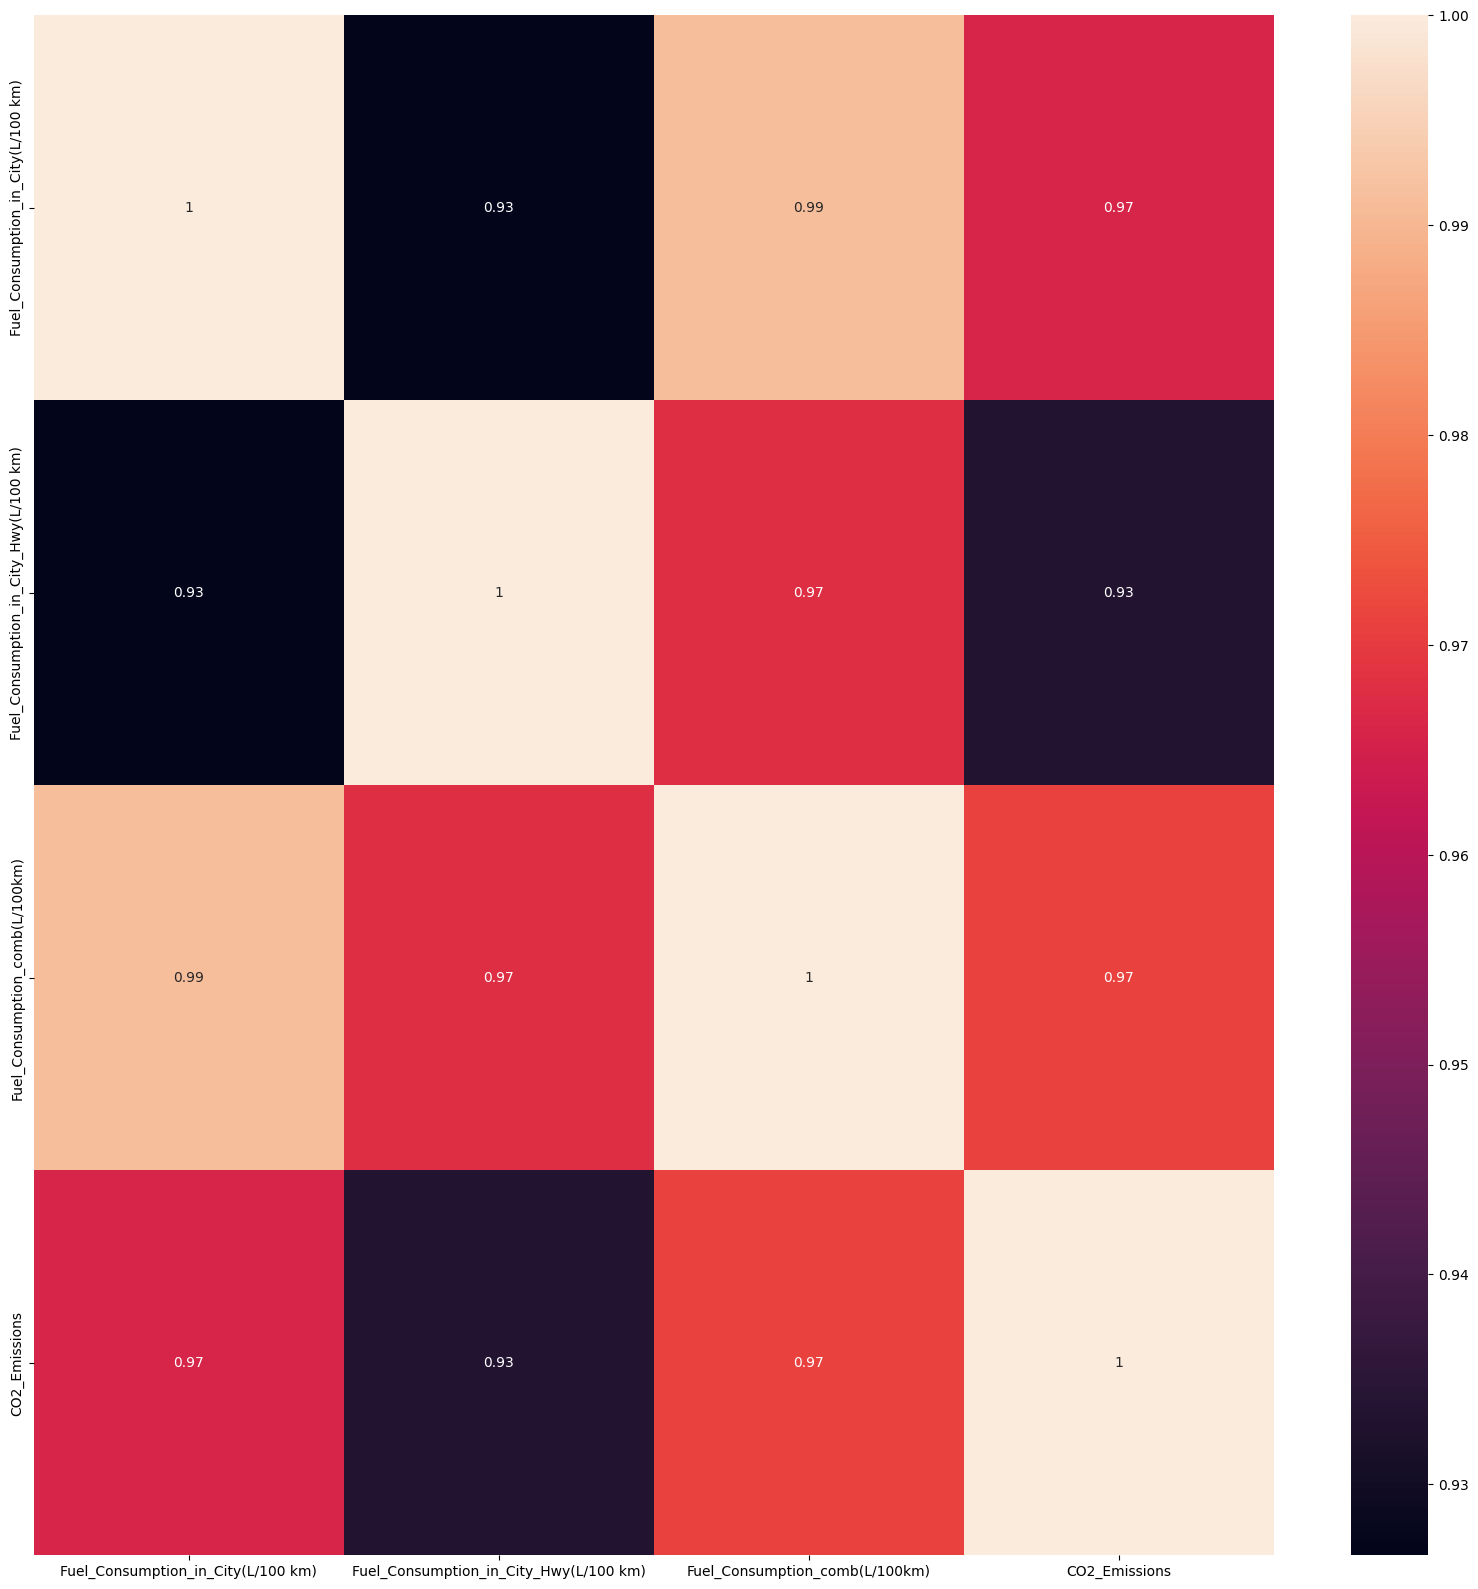

In [ ]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, annot=True)

#5 Análise de Emissão Por Consumo



In [ ]:
# Prever as emissões de CO2 para todas as marcas no conjunto de dados
data['Predicted_CO2'] = model.predict(data[['Fuel_Consumption_comb(L/100km)']])

# Ordenar as marcas de carro pela média das previsões de CO2
previsoes_por_marca = data.groupby('Make')['Predicted_CO2'].mean().sort_values(ascending=False)
print(previsoes_por_marca)

Make
Bugatti          543.371559
Lamborghini      426.286394
Rolls-Royce      380.902299
Bentley          332.128897
Maserati         310.156892
Dodge            309.267137
Aston Martin     306.301287
GMC              297.334048
Ram              281.833025
Chevrolet        281.781240
Ford             280.714297
Porsche          278.320297
BMW              273.072783
Infiniti         266.064589
Mercedes-Benz    263.406309
Audi             260.804229
Chrysler         260.264705
Genesis          259.539720
Lincoln          259.229011
Jaguar           258.814734
Jeep             258.029333
Cadillac         246.885426
Alfa Romeo       238.152646
Acura            233.440240
Lexus            232.634701
Volvo            225.409631
Buick            223.290442
Nissan           220.983670
Volkswagen       218.759283
FIAT             216.040587
Subaru           216.040587
Toyota           204.411227
Mazda            202.090865
MINI             199.530689
Kia              199.075925
Hyundai        

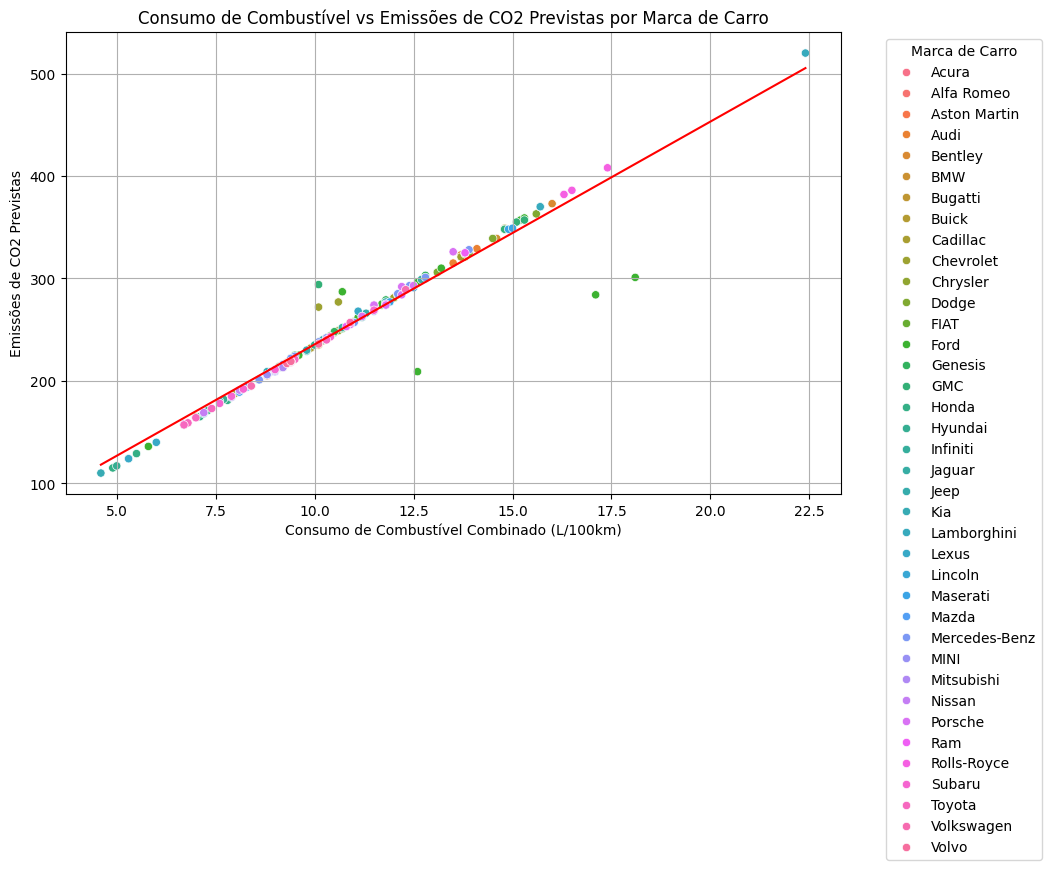

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma figura
plt.figure(figsize=(10, 6))

# Gráfico de dispersão com linha de regressão por marca de carro
sns.scatterplot(x=X_test['Fuel_Consumption_comb(L/100km)'], y=y_test, hue=data['Make'])
sns.lineplot(x=X_test['Fuel_Consumption_comb(L/100km)'], y=y_pred, color='red')

plt.xlabel('Consumo de Combustível Combinado (L/100km)')
plt.ylabel('Emissões de CO2 Previstas')
plt.title('Consumo de Combustível vs Emissões de CO2 Previstas por Marca de Carro')
plt.legend(title='Marca de Carro', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


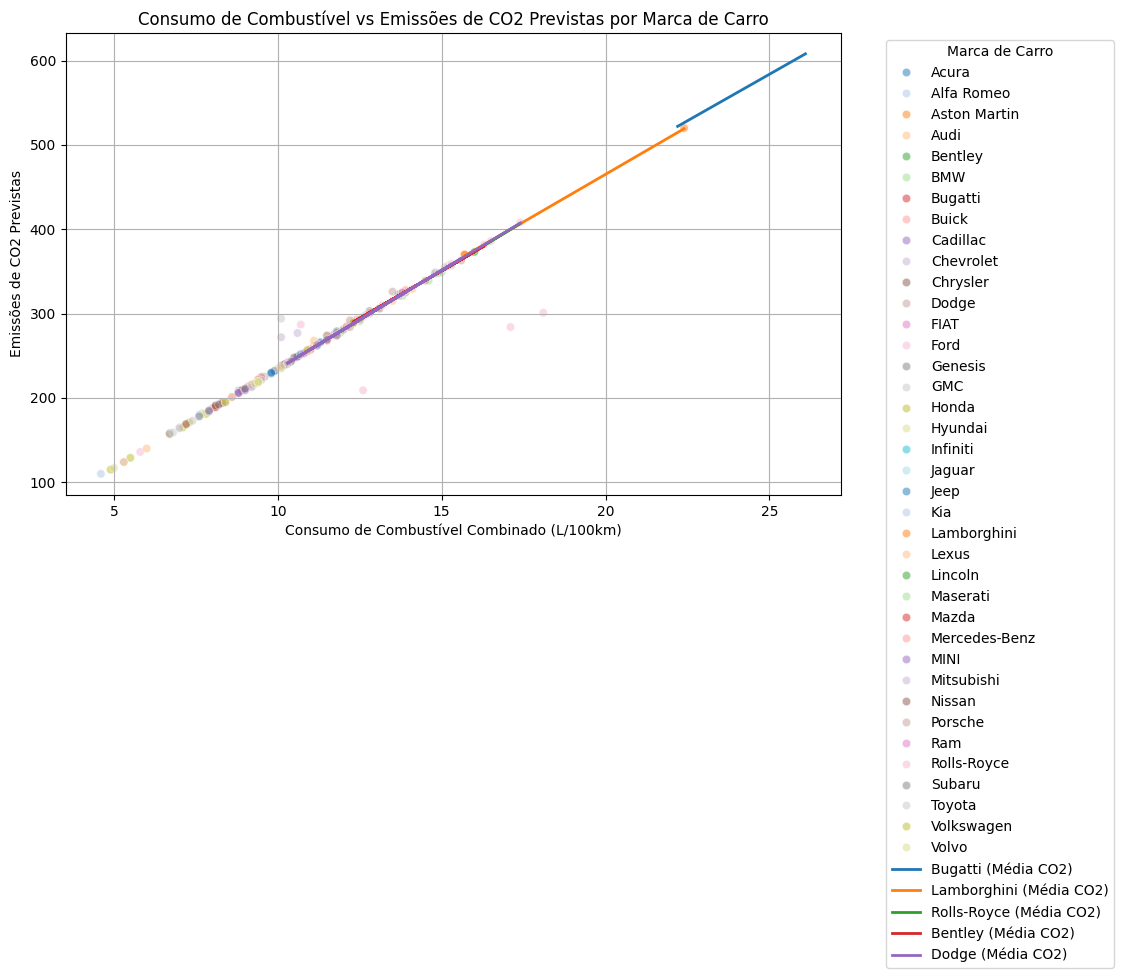

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a média de emissões de CO2 por marca de carro
media_CO2_por_marca = data.groupby('Make')['CO2_Emissions'].mean().sort_values(ascending=False)

# Filtrar as marcas que emitem mais CO2
maiores_emissores = media_CO2_por_marca.head(5).index.tolist()

# Criar uma figura
plt.figure(figsize=(10, 6))

# Gráfico de dispersão com linha de regressão por marca de carro
sns.scatterplot(x=X_test['Fuel_Consumption_comb(L/100km)'], y=y_test, hue=data['Make'], palette='tab20', alpha=0.5)
for marca in maiores_emissores:
    dados_marca = data[data['Make'] == marca]
    X_marca = dados_marca['Fuel_Consumption_comb(L/100km)']
    y_marca = dados_marca['CO2_Emissions']
    modelo_marca = LinearRegression()
    modelo_marca.fit(X_marca.values.reshape(-1, 1), y_marca)
    plt.plot(X_marca, modelo_marca.predict(X_marca.values.reshape(-1, 1)), label=f'{marca} (Média CO2)', linewidth=2)

plt.xlabel('Consumo de Combustível Combinado (L/100km)')
plt.ylabel('Emissões de CO2 Previstas')
plt.title('Consumo de Combustível vs Emissões de CO2 Previstas por Marca de Carro')
plt.legend(title='Marca de Carro', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


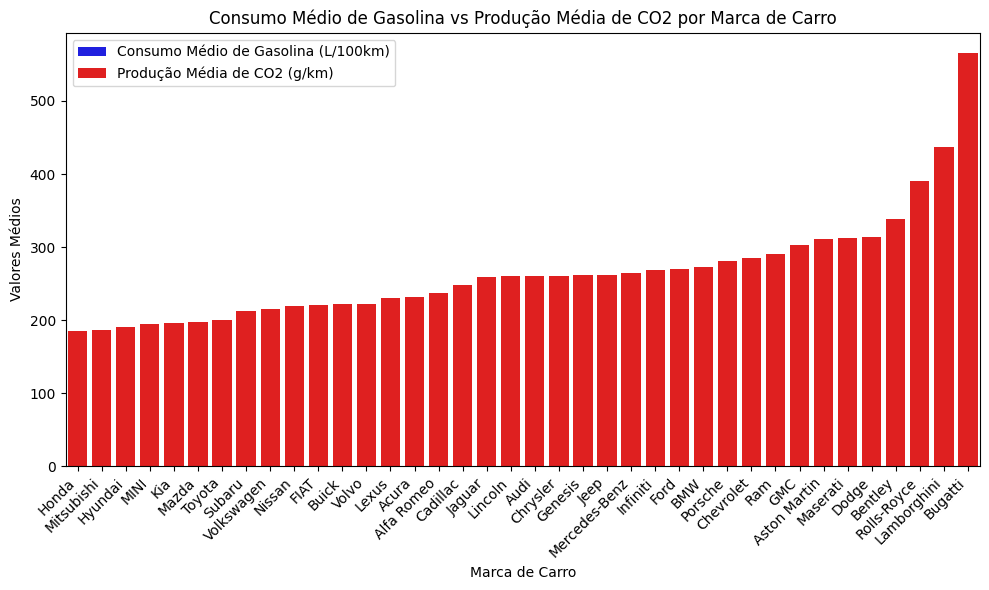

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular o consumo médio de gasolina (Fuel_Consumption_comb(L/100km)) por marca
consumo_medio_por_marca = data.groupby('Make')['Fuel_Consumption_comb(L/100km)'].mean().reset_index()

# Calcular a produção média de CO2 (CO2_Emissions) por marca
producao_media_por_marca = data.groupby('Make')['CO2_Emissions'].mean().reset_index()

# Mesclar os dois dataframes para ter os dados de consumo médio e produção média por marca
razao_por_marca = pd.merge(consumo_medio_por_marca, producao_media_por_marca, on='Make')

# Ordenar o dataframe pela produção média de CO2
razao_por_marca = razao_por_marca.sort_values(by='CO2_Emissions')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Make', y='Fuel_Consumption_comb(L/100km)', data=razao_por_marca, color='blue', label='Consumo Médio de Gasolina (L/100km)')
sns.barplot(x='Make', y='CO2_Emissions', data=razao_por_marca, color='red', label='Produção Média de CO2 (g/km)')
plt.xlabel('Marca de Carro')
plt.ylabel('Valores Médios')
plt.title('Consumo Médio de Gasolina vs Produção Média de CO2 por Marca de Carro')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


#6 Previsão de Emissão de CO2 por Marca


In [ ]:

# Separar variáveis independentes (X) e variável dependente (Y)
X = data[['Fuel_Consumption_comb(L/100km)']]
y = data['CO2_Emissions']

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2}')

R^2 Score: 0.9452109659363117


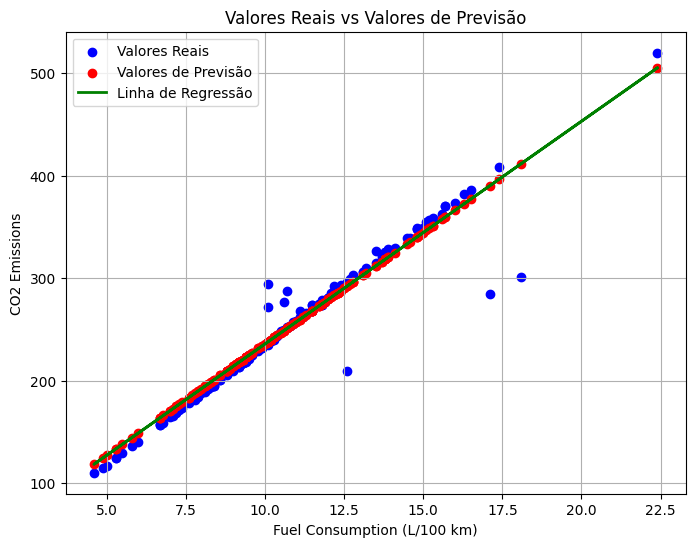

In [ ]:
plt.figure(figsize=(8, 6))

# Plotar os valores reais
plt.scatter(X_test, y_test, color='blue', label='Valores Reais')

# Plotar os valores de previsão
plt.scatter(X_test, y_pred, color='red', label='Valores de Previsão')

# Plotar a linha de regressão
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Linha de Regressão')

plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('CO2 Emissions')
plt.title('Valores Reais vs Valores de Previsão')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
consumo_medio_gasolina = data['Fuel_Consumption_comb(L/100km)'].mean()

# Calcular a produção média de CO2 (CO2_Emissions) com base no consumo médio de gasolina
producao_media_co2 = data['CO2_Emissions'].mean()

# Calcular a razão entre o consumo de gasolina e a produção de CO2
razao_gasolina_co2 = consumo_medio_gasolina / producao_media_co2

print(f'Consumo Médio de Gasolina: {consumo_medio_gasolina} L/100km')
print(f'Produção Média de CO2: {producao_media_co2} g/km')
print(f'Razão entre Gasolina e CO2: {razao_gasolina_co2} L/g')

Consumo Médio de Gasolina: 11.060213903743314 L/100km
Produção Média de CO2: 258.52941176470586 g/km
Razão entre Gasolina e CO2: 0.042781259695935464 L/g
